In [1]:
#importing useful libraries 
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords

#importing warnings
import warnings
warnings.filterwarnings('ignore')

#display options by pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#reading csv file in pandas
data = pd.read_csv('assignment.csv')
data.head(5)

,unique_id,raw_text,review_text
0,0,Spiritually and mentally inspiring! A book tha...,Menginspirasi secara spiritual dan mental! Buk...
1,1,This is one my must have books,Ini adalah salah satu yang harus saya miliki buku
2,2,It is a masterpiece of spirituality,Itu adalah mahakarya spiritualitas
3,3,"I'll be the first to admit, its literary qual...","Saya akan menjadi yang pertama mengakui, kuali..."
4,4,"It is rather simplistically written, but the ...","Ini ditulis agak sederhana, tetapi pesan di ba..."


In [2]:
#cleanig fucntion for this dataset
data.dropna(inplace=True)
#this is shape of our dataset
print("This dataset has " +  str(data.shape[0]) + " rows and")
print(str(data.shape[1]) + " columns")

This dataset has 53682 rows and
3 columns


In [3]:
#column names
data.columns

Index(['unique_id', 'raw_text', 'review_text'], dtype='object')

In [4]:
#Detecting language of column review_text
from textblob import TextBlob
TextBlob(data['review_text'][1]).detect_language() #Here 'id' means indonesian language

'id'

In [5]:
#Translating first row in English 
trans = TextBlob(data['review_text'][0])
trans.translate(from_lang='id' , to='eg'  ) 
data.raw_text[0] #review_text column has same meaning as column raw_text

'Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!'

In [6]:
#Preprocessing and feature extraction

In [7]:
# Number of Uppercase words
data['upper'] = data['raw_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

#Lower case
data['raw_text'] = data['raw_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#getting number of words of raw_text column
data['word_count'] = data['raw_text'].apply(lambda x: len(str(x).split(" ")))

#Number of characters
data['char_count'] = data['raw_text'].str.len() # this also includes spaces


#Average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['raw_text'].apply(lambda x: avg_word(x))

#Number of special characters
data['hastags'] = data['raw_text'].apply(lambda x: len([x for x in x.split() if x.startswith("#")]))

#number of numerics
data['numerics'] = data['raw_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

#Spelling correction
data['raw_text'] = data['raw_text'].apply(lambda x: str(TextBlob(x).correct()))

#Number of stopwords
stop = stopwords.words('english')
data['stopwords'] = data['raw_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data.head(5)

,unique_id,raw_text,review_text,upper,word_count,char_count,avg_word,hastags,numerics,stopwords
0,0,spiritually and mentally inspiring! a book tha...,Menginspirasi secara spiritual dan mental! Buk...,1,22,129,4.909091,0,0,11
1,1,this is one my must have books,Ini adalah salah satu yang harus saya miliki buku,0,7,30,3.428571,0,0,4
2,2,it is a masterpiece of spirituality,Itu adalah mahakarya spiritualitas,0,6,35,5.000000,0,0,4
3,3,"i'll be the first to admit, its literary quali...","Saya akan menjadi yang pertama mengakui, kuali...",0,11,59,4.454545,0,0,5
4,4,"it is rather simplistically written, but the m...","Ini ditulis agak sederhana, tetapi pesan di ba...",0,19,102,4.421053,0,0,12


In [8]:
#Descriptive statistics
data.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
unique_id,31955.636657,18443.317428,0.0,16197.250000,31900.500000,47850.750000,64052.0
upper,0.643009,1.331024,0.0,0.000000,0.000000,1.000000,66.0
word_count,16.210219,11.213368,1.0,9.000000,14.000000,21.000000,220.0
char_count,85.631906,61.616137,1.0,44.000000,73.000000,112.000000,1338.0
avg_word,4.359771,1.145717,1.0,3.857143,4.272727,4.761905,132.0
hastags,0.003819,0.062280,0.0,0.000000,0.000000,0.000000,2.0
numerics,0.083771,0.331757,0.0,0.000000,0.000000,0.000000,7.0
stopwords,7.987594,5.869947,0.0,4.000000,7.000000,11.000000,97.0


  Range_of_word_count  total_word_count  Average_word_count(%)
0             (0, 20]             39151              72.931336
1            (20, 50]             13818              25.740472
2           (50, 100]               678               1.262993
3          (100, 150]                28               0.052159
4          (150, 250]                 7               0.013040


Text(0.5, 1.0, 'Range vs Average of word count')

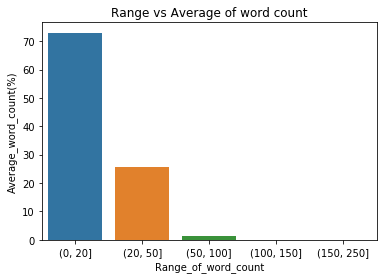

In [9]:
#range of word count VS Average of word count

df1 =data[['word_count','hastags']]
df1['class_interval'] = pd.cut(df1['word_count'] , bins = (0,20,50,100,150,250))
df2 =df1[['class_interval','hastags']].groupby(['class_interval']).count().reset_index()
df2.rename(columns={'class_interval': 'Range_of_word_count', 'hastags': 'total_word_count'} , 
                          inplace= True)
df2['Average_word_count(%)'] = df2['total_word_count'] /df2['total_word_count'].sum() * 100
print(df2)
sns.barplot(df2['Range_of_word_count'] , df2['Average_word_count(%)'])
plt.title("Range vs Average of word count")

  Range_of_characters  char_count  Average_characters_count(%)
0             (0, 50]       16445                    30.634105
1           (50, 100]       20449                    38.092843
2          (100, 500]       16729                    31.163146
3         (500, 1000]          57                     0.106181
4        (1000, 1500]           2                     0.003726


Text(0.5, 1.0, 'Range vs Average of  characters count')

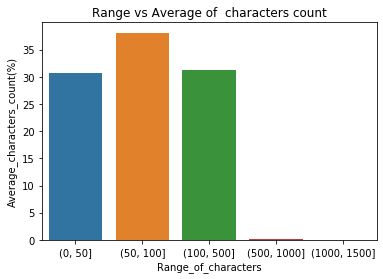

In [10]:
#Range of characters vs average characters count

df3=data[['char_count' ,'hastags']]
df3['Range_of_characters']= pd.cut(df3['char_count'] , bins = (0,50,100,500,1000,1500))
df4 = df3[['Range_of_characters','char_count']].groupby(['Range_of_characters']).count().reset_index()
df4['Average_characters_count(%)'] = df4['char_count'] / df4['char_count'].sum() * 100
print(df4)
sns.barplot(df4['Range_of_characters']  , df4['Average_characters_count(%)'])
plt.title("Range vs Average of  characters count")

        Range  Average_lenght_of_word
0      (0, 1]                     371
1      (1, 5]                   45025
2      (5, 7]                    7796
3     (7, 10]                     429
4   (10, 100]                      60
5  (100, 150]                       1


Text(0.5, 1.0, 'Range vs Average lenght of word')

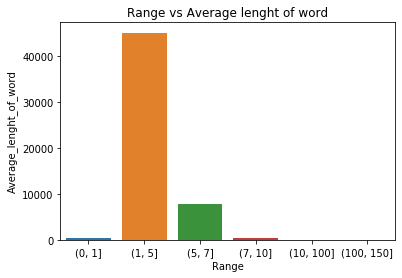

In [11]:
#range vs Average_lenght_of_word

df5 =data[['avg_word','hastags']]
df5['class_interval'] = pd.cut(df5['avg_word'] , bins =(0,1,5,7,10,100,150))
df6 = df5[['class_interval','avg_word']].groupby(['class_interval']).count().reset_index()
df6.rename(columns={'class_interval': 'Range', 'avg_word': 'Average_lenght_of_word'} , 
                          inplace= True)
print(df6)
sns.barplot(df6['Range'] , df6['Average_lenght_of_word'])
plt.title("Range vs Average lenght of word")

  Range_of_hastags  Number_of_hastags  Average_hastags
0           (0, 1]                201        99.014778
1           (1, 2]                  2         0.985222
2           (2, 3]                  0         0.000000


Text(0.5, 1.0, 'Range of hastage vs number of hastags')

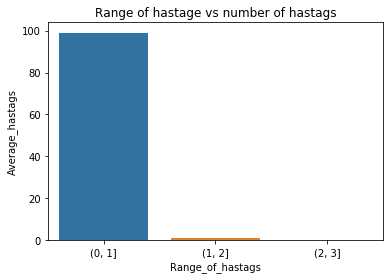

In [12]:
#Range of hastage vs number of hastags

df7  = data[['hastags','unique_id']]
df7['Range_of_hastags'] = pd.cut(df7['hastags'] , bins = (0,1,2,3))
df7.dropna(inplace= True)
df8 = df7[['Range_of_hastags','hastags']].groupby(['Range_of_hastags']).count().reset_index()
df8['Average_hastags'] = df8['hastags'] / df8['hastags'].sum() * 100
df8.rename(columns={'hastags': 'Number_of_hastags'} , inplace= True)
print(df8)
sns.barplot(df8['Range_of_hastags'] , df8['Average_hastags'])
plt.title("Range of hastage vs number of hastags")

      Range  upper_case  Average_upper_case_alpha
0    (0, 1]       14936                 68.372625
1    (1, 2]        4601                 21.062028
2    (2, 5]        1996                  9.137102
3   (5, 10]         193                  0.883497
4  (10, 20]          88                  0.402838
5  (20, 50]          29                  0.132753
6  (50, 80]           2                  0.009155


Text(0.5, 1.0, 'Upper_Case Alphabets VS Range')

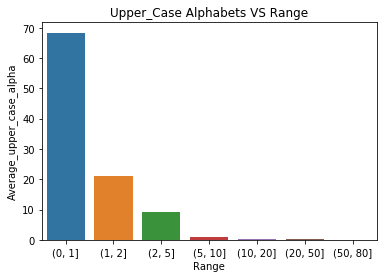

In [13]:
#Upper_Case Alphabets VS Range 
df9= data[['upper','hastags']]
df9['Range'] = pd.cut(df9['upper'] , bins=(0,1,2,5,10,20,50,80))
df9.dropna(inplace=True)
df10  = df9[['Range','upper']].groupby(['Range']).count().reset_index()
df10.rename(columns={'upper': 'upper_case'} , inplace= True)
df10['Average_upper_case_alpha'] = df10['upper_case'] / df10['upper_case'].sum() * 100
print(df10)
sns.barplot(df10['Range'] , df10['Average_upper_case_alpha'])
plt.title("Upper_Case Alphabets VS Range")

In [31]:
#Lemmatization
from textblob import Word
data['raw_text'] = data['raw_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#Removing Punctuation
data['raw_text'] = data['raw_text'].str.replace('[^\w\s]','')
#removing numbers from raw_text column
data['raw_text'] = data['raw_text'].str.replace('\d+', '')
data.head()

,unique_id,raw_text,review_text,upper,word_count,char_count,avg_word,hastags,numerics,stopwords,sentiment_analysis,sentiment,subjectivity
0,0,spiritually and mentally inspiring a book that...,Menginspirasi secara spiritual dan mental! Buk...,1,22,129,4.909091,0,0,11,"(0.2916666666666667, 0.4444444444444444)",0.29,0.44
1,1,this is one my must have book,Ini adalah salah satu yang harus saya miliki buku,0,7,30,3.428571,0,0,4,"(0.0, 0.0)",0.00,0.00
2,2,it is a masterpiece of spirituality,Itu adalah mahakarya spiritualitas,0,6,35,5.000000,0,0,4,"(0.0, 0.0)",0.00,0.00
3,3,ill be the first to admit it literary quality ...,"Saya akan menjadi yang pertama mengakui, kuali...",0,11,59,4.454545,0,0,5,"(0.18333333333333335, 0.2111111111111111)",0.18,0.21
4,4,it is rather simplistically written but the me...,"Ini ditulis agak sederhana, tetapi pesan di ba...",0,19,102,4.421053,0,0,12,"(-0.05000000000000002, 0.85)",-0.05,0.85


    Range  numerics  Average of numerics
0  (0, 1]      3198            84.536082
1  (1, 2]       491            12.979117
2  (2, 3]        70             1.850383
3  (3, 4]        17             0.449379
4  (4, 5]         4             0.105736
5  (5, 6]         2             0.052868
6  (6, 7]         1             0.026434
7  (7, 8]         0             0.000000


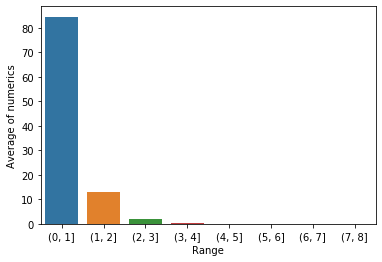

In [32]:
df11= data[['numerics','hastags']]
df11['Range'] = pd.cut(df11['numerics'] , bins =(0,1,2,3,4,5,6,7,8))
df12 = df11[['Range','numerics']].groupby(['Range']).count().reset_index()
df12['Average of numerics'] = df12['numerics'] / df12['numerics'].sum() * 100
print(df12)
sns.barplot(df12['Range'] , df12['Average of numerics'])

In [33]:
# #Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['raw_text'] = data['raw_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head(5)

,unique_id,raw_text,review_text,upper,word_count,char_count,avg_word,hastags,numerics,stopwords,sentiment_analysis,sentiment,subjectivity
0,0,spiritually mentally inspiring book allows que...,Menginspirasi secara spiritual dan mental! Buk...,1,22,129,4.909091,0,0,11,"(0.2916666666666667, 0.4444444444444444)",0.29,0.44
1,1,one must book,Ini adalah salah satu yang harus saya miliki buku,0,7,30,3.428571,0,0,4,"(0.0, 0.0)",0.00,0.00
2,2,masterpiece spirituality,Itu adalah mahakarya spiritualitas,0,6,35,5.000000,0,0,4,"(0.0, 0.0)",0.00,0.00
3,3,ill first admit literary quality isnt much,"Saya akan menjadi yang pertama mengakui, kuali...",0,11,59,4.454545,0,0,5,"(0.18333333333333335, 0.2111111111111111)",0.18,0.21
4,4,rather simplistically written message behind p...,"Ini ditulis agak sederhana, tetapi pesan di ba...",0,19,102,4.421053,0,0,12,"(-0.05000000000000002, 0.85)",-0.05,0.85


       Range  stopwords  Average_of_Stopwords
0    (0, 10]      37481             72.648860
1   (10, 20]      12362             23.961079
2   (20, 30]       1429              2.769809
3   (30, 50]        288              0.558226
4   (50, 70]         23              0.044581
5  (70, 100]          9              0.017445


Text(0.5, 1.0, 'Range of stopwords')

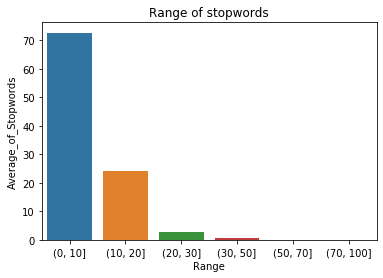

In [147]:
#Range of stopwords
df13 = data[['stopwords','numerics']]
df13['Range'] = pd.cut(df13['stopwords'] , bins=(0,10,20,30,50,70,100))
df14= df13.groupby(df13['Range']).count().reset_index()
df14['Average_of_Stopwords'] = df14['stopwords'] / df14['stopwords'].sum() * 100
print(df14[['Range','stopwords','Average_of_Stopwords']])
sns.barplot(df14['Range'] , df14['Average_of_Stopwords'])
plt.title("Range of stopwords")

In [35]:
#Sentiment Analysis
data['sentiment_analysis'] = data['raw_text'].apply(lambda x: TextBlob(x).sentiment)
data['sentiment'] = data['raw_text'].apply(lambda x: TextBlob(x).sentiment[0] )
data['sentiment'] = data['sentiment'].round(2)  
data['subjectivity'] = data['raw_text'].apply(lambda x: TextBlob(x).sentiment[1] )
data['subjectivity'] = data['subjectivity'].round(2)
data.head()

,unique_id,raw_text,review_text,upper,word_count,char_count,avg_word,hastags,numerics,stopwords,sentiment_analysis,sentiment,subjectivity
0,0,spiritually mentally inspiring book allows que...,Menginspirasi secara spiritual dan mental! Buk...,1,22,129,4.909091,0,0,11,"(0.2333333333333333, 0.48333333333333334)",0.23,0.48
1,1,one must book,Ini adalah salah satu yang harus saya miliki buku,0,7,30,3.428571,0,0,4,"(0.0, 0.0)",0.00,0.00
2,2,masterpiece spirituality,Itu adalah mahakarya spiritualitas,0,6,35,5.000000,0,0,4,"(0.0, 0.0)",0.00,0.00
3,3,ill first admit literary quality isnt much,"Saya akan menjadi yang pertama mengakui, kuali...",0,11,59,4.454545,0,0,5,"(0.012500000000000004, 0.4083333333333333)",0.01,0.41
4,4,rather simplistically written message behind p...,"Ini ditulis agak sederhana, tetapi pesan di ba...",0,19,102,4.421053,0,0,12,"(-0.05000000000000002, 0.85)",-0.05,0.85


In [36]:
#Descriptive statistics for sentimental analysis and subjectivity
data[['sentiment','subjectivity']].describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,53682.0,0.153200,0.303675,-1.0,0.0,0.05,0.35,1.0
subjectivity,53682.0,0.400109,0.319714,0.0,0.0,0.42,0.63,1.0


          Range  sentiment  Average_of_sentiment(%)
0  (-1.0, -0.8]        166                 0.309956
1  (-0.8, -0.6]        420                 0.784226
2  (-0.6, -0.4]       1022                 1.908283
3  (-0.4, -0.2]       2157                 4.027560
4   (-0.2, 0.0]      22029                41.132646
5    (0.0, 0.2]       8646                16.143849
6    (0.2, 0.4]       8800                16.431399
7    (0.4, 0.6]       6281                11.727911
8    (0.6, 0.8]       2824                 5.272985
9    (0.8, 1.0]       1211                 2.261185


Text(0.5, 1.0, 'Sentiments vs Average Sentiments')

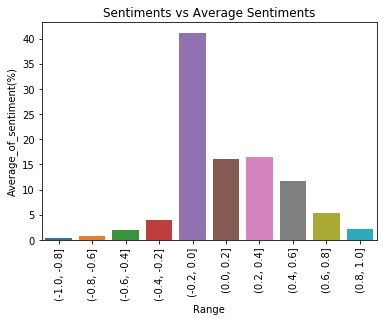

In [37]:
#Sentimental analysis
df15= data[['sentiment','subjectivity']]
df15['Range'] = pd.cut(df15['sentiment'], bins= (-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1))
df16 = df15.groupby(['Range']).count().reset_index()
df16['Average_of_sentiment(%)'] = df16['sentiment'] / df16['sentiment'].sum() * 100
print(df16[['Range','sentiment','Average_of_sentiment(%)']])
sns.barplot(df16['Range'] , df16['Average_of_sentiment(%)'])
plt.xticks(rotation=90)
plt.title("Sentiments vs Average Sentiments")

         Range  subjectivity  Average_of_Subjectivity
0  (-0.2, 0.0]         14771                27.515741
1   (0.0, 0.2]          3546                 6.605566
2   (0.2, 0.4]          7975                14.856004
3   (0.4, 0.6]         13076                24.358258
4   (0.6, 0.8]          8412                15.670057
5   (0.8, 1.0]          5902                10.994374


Text(0.5, 1.0, 'subjectivity analysis vs average of subjectivity')

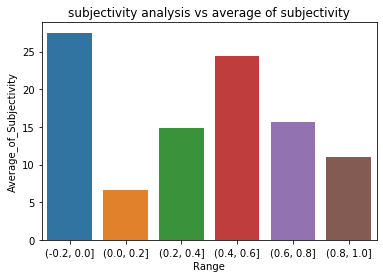

In [188]:
#Subjectivity analysis vs average of subjectivity

df17 = data[['subjectivity','sentiment']]
df17['Range'] = pd.cut(df17['subjectivity'], bins =(-0.2,0,0.2,0.4,0.6,0.8,1))
df18 = df17.groupby(['Range']).count().reset_index()
df18['Average_of_Subjectivity'] = df18['subjectivity'] / df18['subjectivity'].sum() * 100
print(df18[['Range','subjectivity','Average_of_Subjectivity']])
sns.barplot(df18['Range'] , df18['Average_of_Subjectivity'])
plt.title("subjectivity analysis vs average of subjectivity")

  subjectivity_state  subjectivity  Average_of_subjectivity
0            Neutral         14984                27.912522
1           Positive         38698                72.087478


Text(0.5, 1.0, 'sentiments vs subjectivity')

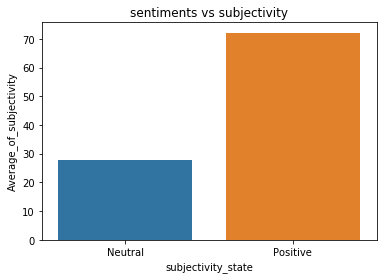

In [39]:
#subjectivity vs  average of subjectivity

df19=data[['sentiment','subjectivity']].round(1)
df19.loc[df19['sentiment'] > 0, 'Sentiment_state'] = 'Positive'
df19.loc[df19['sentiment'] == 0, 'Sentiment_state'] = 'Neutral'
df19.loc[df19['sentiment'] < 0, 'Sentiment_state'] = 'Negative'

df19.loc[df19['subjectivity'] > 0, 'subjectivity_state'] = 'Positive'
df19.loc[df19['subjectivity'] == 0, 'subjectivity_state'] = 'Neutral'
df19.loc[df19['subjectivity'] < 0, 'subjectivity_state'] = 'Negative'
df20 =df19.groupby(['subjectivity_state']).count().reset_index()
df20['Average_of_subjectivity'] = df20['subjectivity'] / df20['subjectivity'].sum() * 100
print(df20[['subjectivity_state','subjectivity','Average_of_subjectivity']])
sns.barplot(df20['subjectivity_state'] , df20['Average_of_subjectivity'])
plt.title("sentiments vs subjectivity")

  Sentiment_state  sentiment  Average_of_sentiment
0        Negative       6935             12.918669
1         Neutral      20252             37.725867
2        Positive      26495             49.355464


Text(0.5, 1.0, 'Sentimental anlysis')

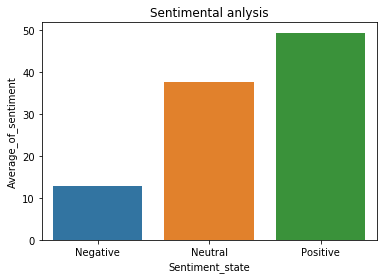

In [189]:
#Sentimental anlysis on the basics of Negative , Neutral , Positive
df20 = df19.groupby(['Sentiment_state']).count().reset_index()
df20['Average_of_sentiment']  = df20['sentiment'] / df20['sentiment'].sum() * 100
print(df20[['Sentiment_state','sentiment','Average_of_sentiment']])
sns.barplot(df20['Sentiment_state'] ,df20['Average_of_sentiment'] )
plt.title("Sentimental anlysis")

  Sentiment_state subjectivity_state  sentiment  subjectivity
0        Negative            Neutral        101           101
1        Negative           Positive       6834          6834
2         Neutral            Neutral      14821         14821
3         Neutral           Positive       5431          5431
4        Positive            Neutral         62            62
5        Positive           Positive      26433         26433


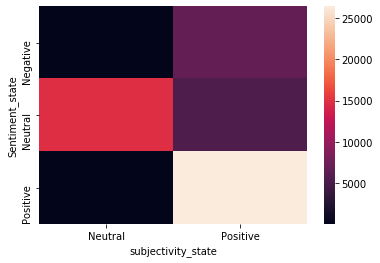

In [41]:
#sentiment vs subjectivity
df22=df19.groupby(['Sentiment_state','subjectivity_state']).count().reset_index()
print(df22)
sns.heatmap(pd.crosstab(df19['Sentiment_state'], df19['subjectivity_state']) )

In [168]:
# some other useful analysis 
data2 = data['raw_text'].sum()
#Tokenization
from nltk.tokenize import word_tokenize
word_tokens= word_tokenize(data2)
word_tokens

['spiritually',
 'mentally',
 'inspiring',
 'book',
 'allows',
 'question',
 'moral',
 'help',
 'discover',
 'reallyone',
 'must',
 'bookmasterpiece',
 'spiritualityill',
 'first',
 'admit',
 'literary',
 'quality',
 'isnt',
 'muchrather',
 'simplistically',
 'written',
 'message',
 'behind',
 'powerful',
 'readtake',
 'enlightenmentbook',
 'provides',
 'reflection',
 'apply',
 'lifeway',
 'try',
 'ass',
 'whether',
 'truly',
 'right',
 'thing',
 'making',
 'short',
 'time',
 'planefirst',
 'read',
 'prophet',
 'college',
 'backbook',
 'revival',
 'anything',
 'metaphysical',
 'turbulentprofound',
 'effect',
 'became',
 'book',
 'always',
 'tookgranulation',
 'joined',
 'peace',
 'corp',
 'distressful',
 'training',
 'country',
 'liberia',
 'time',
 'illness',
 'night',
 'left',
 'book',
 'gave',
 'great',
 'comfortread',
 'married',
 'child',
 'born',
 'two',
 'near',
 'fatal',
 'illnessalways',
 'amazed',
 'chapter',
 'reach',
 'grab',
 'offer',
 'comfort',
 'hope',
 'futurefibrin',


In [169]:
#sentimental anlysis of whole text together
blob2 = TextBlob(data2)
print(blob2.sentiment)

Sentiment(polarity=0.1712635669790787, subjectivity=0.5139508385050721)


In [170]:
#part of speech tags
from nltk import  word_tokenize , pos_tag
pos_tag(word_tokens)

[('spiritually', 'RB'),
 ('mentally', 'RB'),
 ('inspiring', 'VBG'),
 ('book', 'NN'),
 ('allows', 'VBZ'),
 ('question', 'NN'),
 ('moral', 'JJ'),
 ('help', 'NN'),
 ('discover', 'VB'),
 ('reallyone', 'NN'),
 ('must', 'MD'),
 ('bookmasterpiece', 'VB'),
 ('spiritualityill', 'NN'),
 ('first', 'JJ'),
 ('admit', 'NN'),
 ('literary', 'JJ'),
 ('quality', 'NN'),
 ('isnt', 'NN'),
 ('muchrather', 'RBR'),
 ('simplistically', 'RB'),
 ('written', 'VBN'),
 ('message', 'NN'),
 ('behind', 'IN'),
 ('powerful', 'JJ'),
 ('readtake', 'JJ'),
 ('enlightenmentbook', 'NN'),
 ('provides', 'VBZ'),
 ('reflection', 'NN'),
 ('apply', 'VB'),
 ('lifeway', 'JJ'),
 ('try', 'NN'),
 ('ass', 'NN'),
 ('whether', 'IN'),
 ('truly', 'RB'),
 ('right', 'JJ'),
 ('thing', 'NN'),
 ('making', 'VBG'),
 ('short', 'JJ'),
 ('time', 'NN'),
 ('planefirst', 'JJ'),
 ('read', 'JJ'),
 ('prophet', 'NN'),
 ('college', 'NN'),
 ('backbook', 'NN'),
 ('revival', 'NN'),
 ('anything', 'NN'),
 ('metaphysical', 'JJ'),
 ('turbulentprofound', 'NN'),
 ('ef

In [171]:
#  Term frequency
tf1 = data['raw_text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.sort_values(by='tf' ,ascending=False)

,words,tf
149,wa,6333.0
10,one,4148.0
5,book,3033.0
165,like,2887.0
66,great,2599.0
38,time,2403.0
301,would,2336.0
173,ha,2329.0
831,good,2243.0
251,get,2162.0


   words  Term_frequency
0     wa          6333.0
1    one          4148.0
2   book          3033.0
3   like          2887.0
4  great          2599.0
5   time          2403.0
6  would          2336.0
7     ha          2329.0
8   good          2243.0
9    get          2162.0


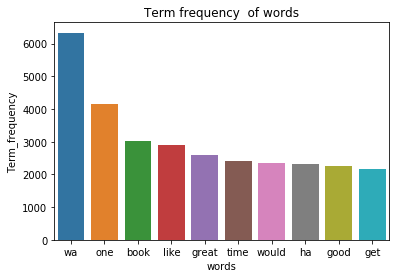

In [174]:
# Term frequency word cloud
term_frequency =tf1.sort_values(by='tf' ,ascending=False).head(10)
term_frequency.reset_index(drop=True, inplace=True)
term_frequency.columns = ['words','Term_frequency']
print(term_frequency)

plt.title("Term frequency  of words")
sns.barplot(term_frequency.words , term_frequency.Term_frequency)

In [190]:
#Inverse Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['raw_text'].str.contains(word)])))
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head(10)

,words,tf,idf,tfidf
0,inspiring,30.0,7.425097,222.752914
1,help,348.0,4.604835,1602.482557
2,really,1565.0,3.568983,5585.458888
3,question,135.0,5.821929,785.960392
4,mentally,23.0,7.712779,177.393922
5,book,3033.0,2.799818,8491.847955
6,allows,129.0,6.015636,776.017006
7,discover,21.0,6.358234,133.522904
8,moral,33.0,7.129633,235.277886
9,spiritually,10.0,8.492938,84.929378


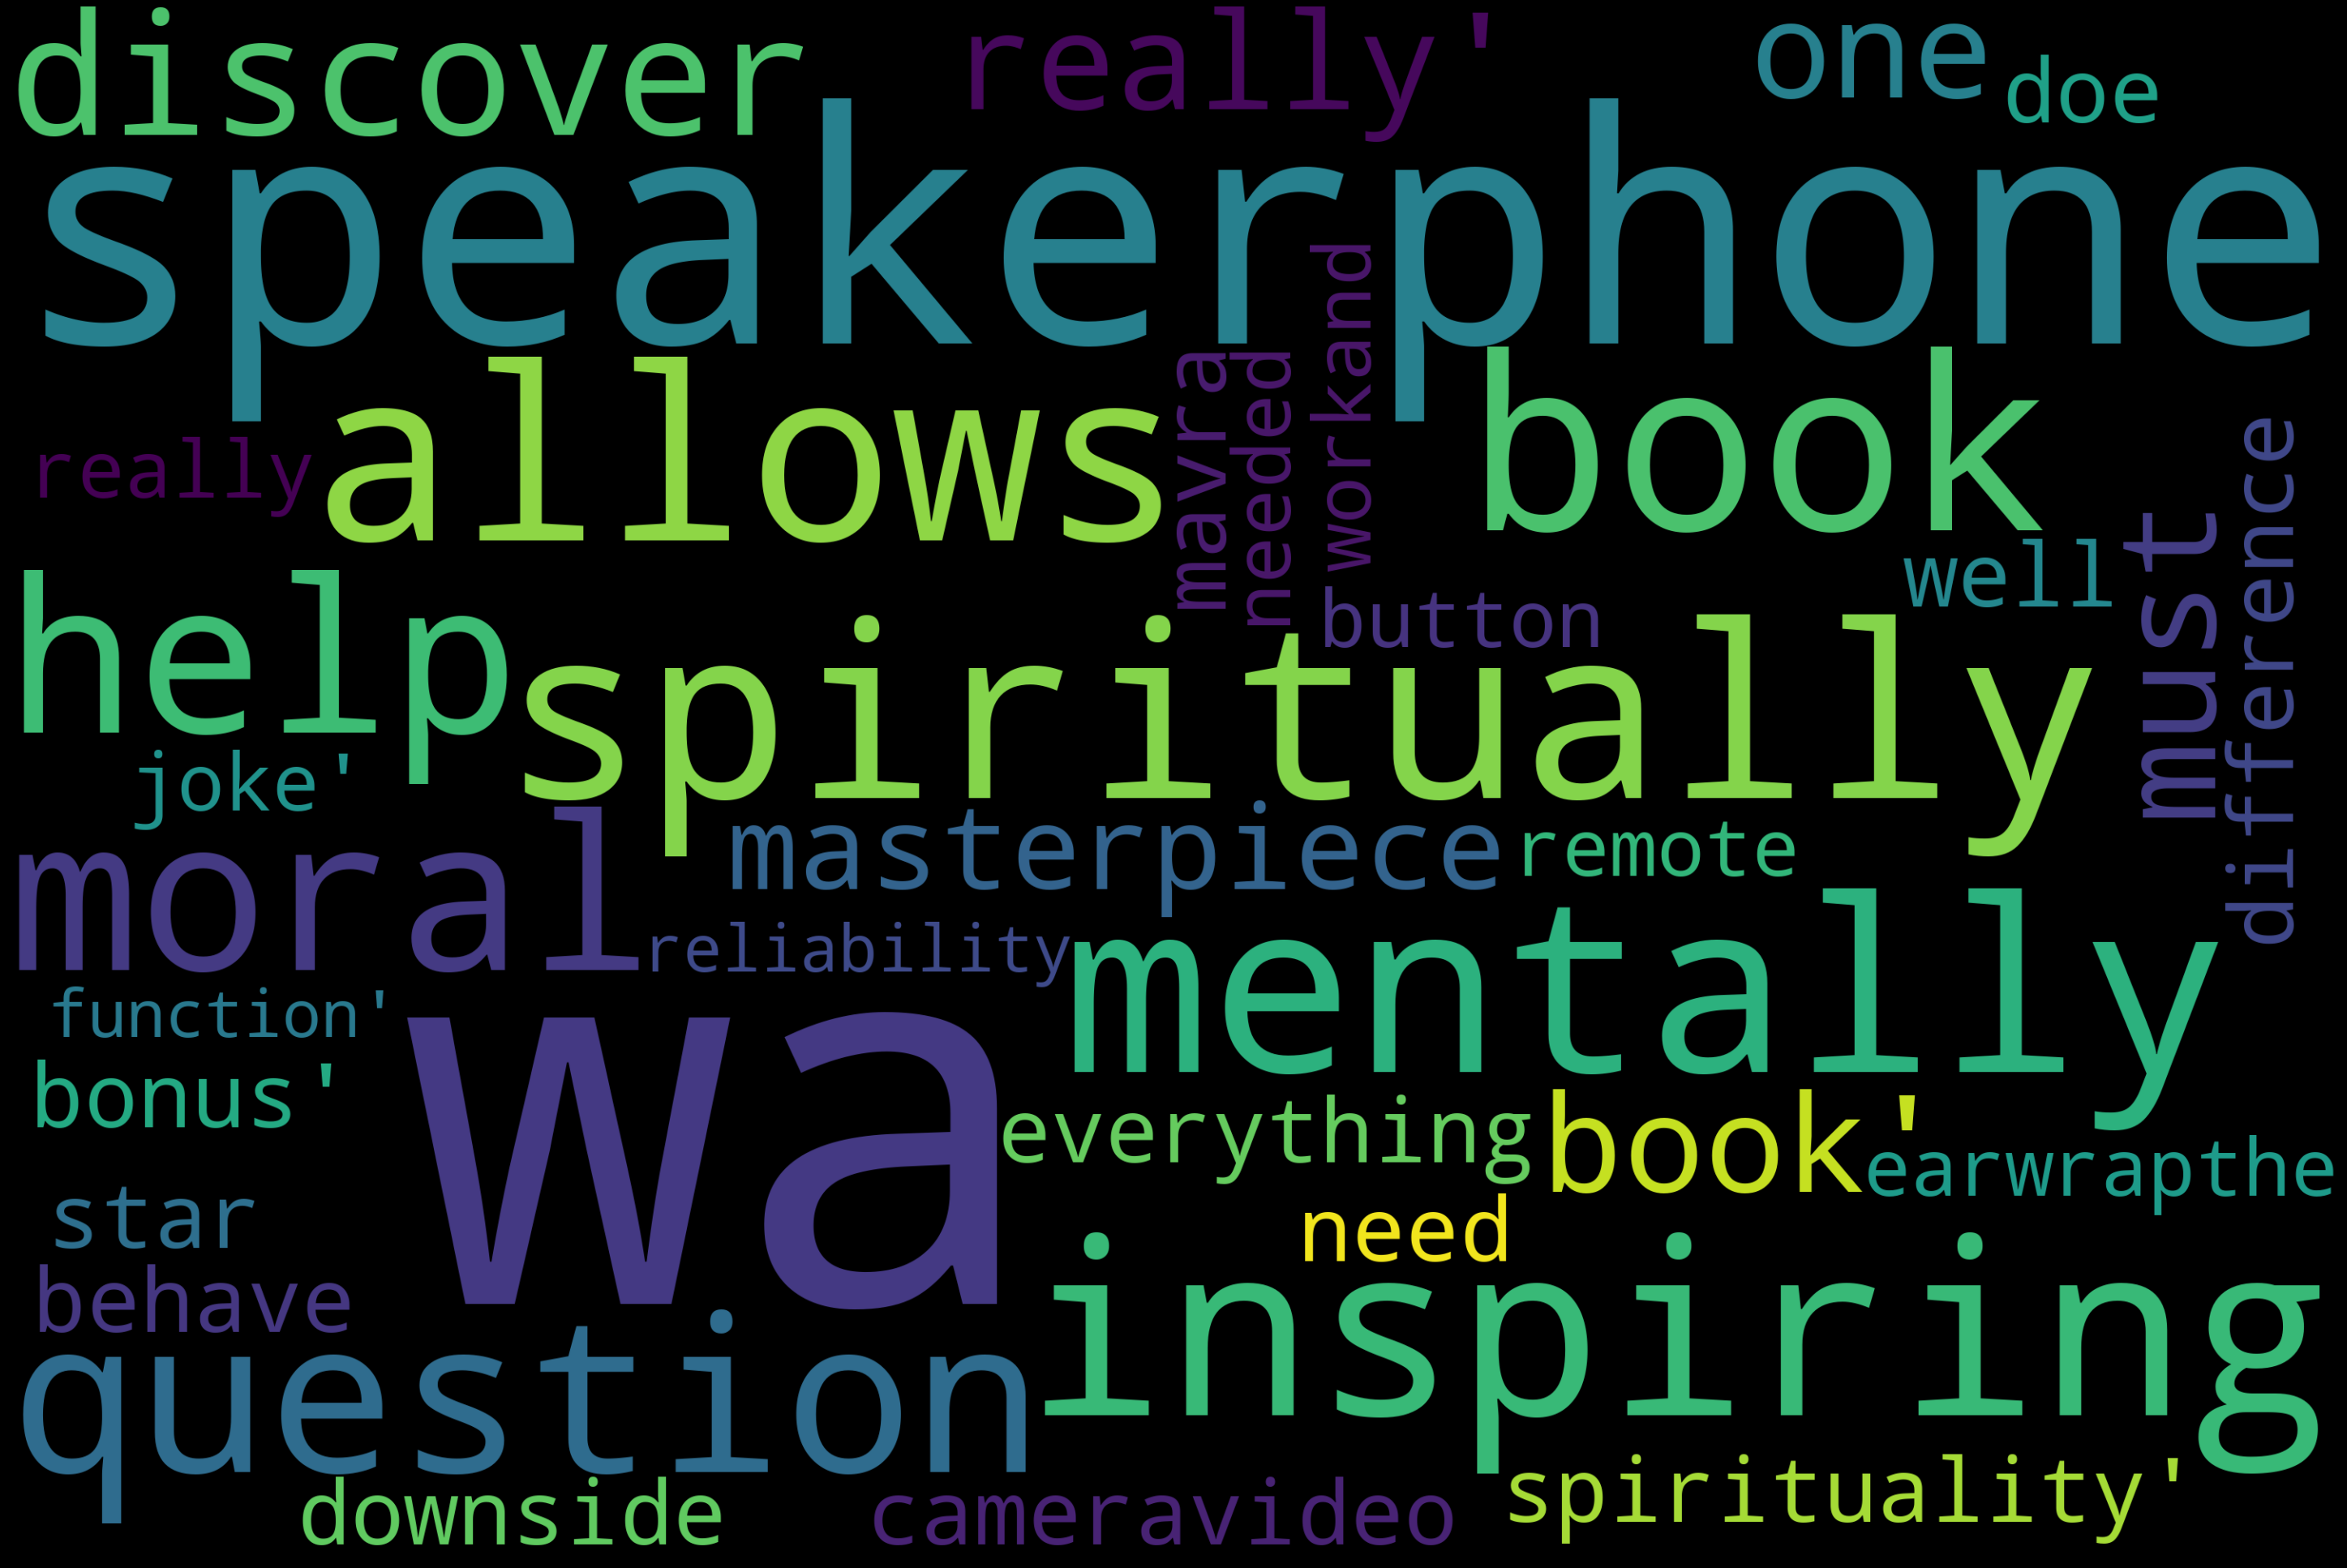

In [175]:
#Word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data['raw_text'].values
wordcloud = WordCloud()
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()